In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/Sensi analysis/Final model Speed sensi-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000030 entries, 0 to 3000029
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                       

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['prob-of-violating-rules', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
list(df1.columns)

['run number',
 'walking-radius',
 'new-car-treshold',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'speed',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
df1.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,speed,starting-bottom-price,tick,satisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,1,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,2,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,3,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,3,0.5,True,True,20,40,10,1,0,...,9.997,600,489,0,0,0,0,0,0,0.0
4,2,3,0.5,True,True,20,40,10,1,0,...,9.997,599,490,0,0,0,0,0,0,0.0


In [8]:
df2 = df1.loc[df1['speed'] == 40 ]
df2.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,speed,starting-bottom-price,tick,satisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,1,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,2,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,3,3,0.5,True,True,20,40,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,3,0.5,True,True,20,40,10,1,0,...,9.997,600,489,0,0,0,0,0,0,0.0
4,2,3,0.5,True,True,20,40,10,1,0,...,9.997,599,490,0,0,0,0,0,0,0.0


In [9]:
df3 = df1.loc[df1['speed'] == 60 ]
df3.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,speed,starting-bottom-price,tick,satisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
771887,11,3,0.5,True,True,20,60,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
771890,11,3,0.5,True,True,20,60,10,1,0,...,9.997,599,490,0,0,0,0,0,0,0.0
771892,11,3,0.5,True,True,20,60,10,2,0,...,9.994,599,490,0,0,0,0,0,0,0.0
771896,11,3,0.5,True,True,20,60,10,3,0,...,9.991,599,490,0,0,0,0,1,0,0.0
771900,11,3,0.5,True,True,20,60,10,4,0,...,9.988,599,490,0,0,0,0,2,0,0.0


In [10]:
df4 = df1.loc[df1['speed'] == 80 ]
df4.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,speed,starting-bottom-price,tick,satisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
1916463,21,3,0.5,True,True,20,80,10,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1916467,21,3,0.5,True,True,20,80,10,1,0,...,9.997,599,490,0,0,0,0,0,0,0.0
1916471,21,3,0.5,True,True,20,80,10,2,0,...,9.994,598,491,0,0,0,0,0,0,0.0
1916475,21,3,0.5,True,True,20,80,10,3,0,...,9.991,598,491,0,0,0,0,0,0,0.0
1916477,21,3,0.5,True,True,20,80,10,4,0,...,9.994,598,491,0,0,0,0,0,0,0.0


In [11]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

30.765884681823678
22.00686007672456


In [12]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

94.88140240033027
38.566555286554646


In [13]:
df4_mean = df4['market-price'].mean()
print(df4_mean)
df4_std = df4['market-price'].std()
print(df4_std)

91.38449535271685
32.96320226929181


Text(0, 0.5, 'Combined company profits')

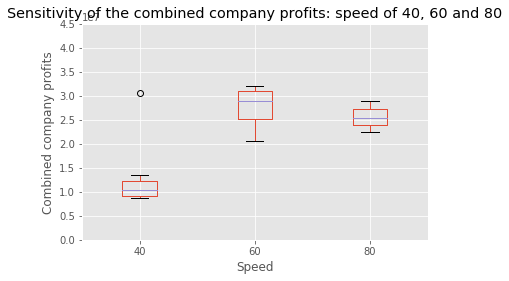

In [18]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['speed'])
plt.ylim(0, 45000000 )
plot.get_figure().gca().set_title("Sensitivity of the combined company profits: speed of 40, 60 and 80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Speed")
plot.get_figure().gca().set_ylabel("Combined company profits")

Text(0, 0.5, 'Total satisfied users')

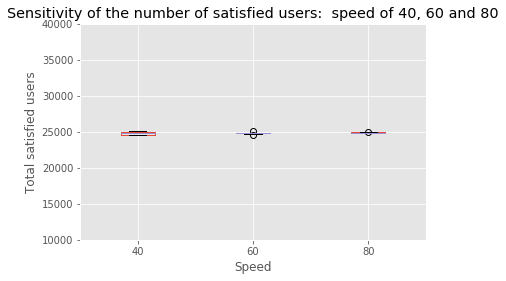

In [19]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['speed'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of satisfied users:  speed of 40, 60 and 80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Speed")
plot.get_figure().gca().set_ylabel("Total satisfied users")

Text(0, 0.5, 'Total unsatisfied users')

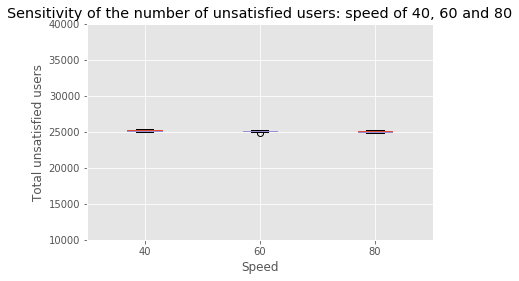

In [20]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['speed'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of unsatisfied users: speed of 40, 60 and 80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Speed")
plot.get_figure().gca().set_ylabel("Total unsatisfied users")

Text(0, 0.5, 'Number of times no parking was found')

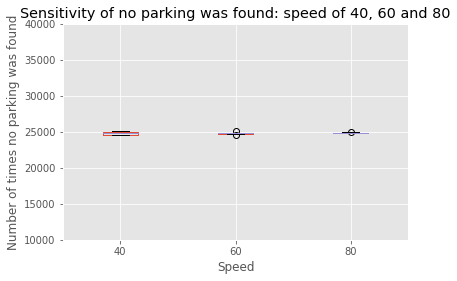

In [21]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['speed'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of no parking was found: speed of 40, 60 and 80")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Speed")
plot.get_figure().gca().set_ylabel("Number of times no parking was found")